# Movie Reviews Text Classification 

### Goal: Given a set of text movie reviews that have been labeled negative or positive, build  a model to classify new tweets as positive or negative.

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/



In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**Check to see if there are any missing values in the dataframe.**

In [4]:
df.isnull().sum()

label      0
review    35
dtype: int64

**Remove any reviews that are NaN**

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

label     0
review    0
dtype: int64

**Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [9]:
df['review'].str.isspace().sum()

27

27

In [13]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [16]:
df[~df['review'].str.isspace()]

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [17]:
df = df[~df['review'].str.isspace()]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**Confirm the value counts per label:**

In [19]:
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

## EDA on Bag of Words

**Figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [55]:
count_vect = CountVectorizer(stop_words='english')

In [56]:
positive_r = df[df['label'] == 'pos']
negative_r = df[df['label'] == 'neg']

In [57]:
pos_rev = positive_r['review']
neg_rev = negative_r['review']

In [94]:
matrix = count_vect.fit_transform(neg_rev)
freqs = zip(count_vect.get_feature_names(), matrix.sum(axis=0).tolist()[0])
# sort from largest to smallest
print('Top 20 words for Negative reviews')
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words for Negative reviews
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [95]:
matrix = count_vect.fit_transform(pos_rev)
freqs = zip(count_vect.get_feature_names(), matrix.sum(axis=0).tolist()[0])
# sort from largest to smallest
print('Top 20 words for Positive reviews')
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words for Positive reviews
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data


In [61]:
X = df['review']
y = df['label']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [65]:
tfidf = TfidfVectorizer()

In [66]:
nb_model = MultinomialNB()

In [67]:
from sklearn.pipeline import Pipeline

In [91]:
#pipe = Pipeline(steps=(['tfidf',TfidfVectorizer()], ['nb', MultinomialNB()]))
pipe = Pipeline(steps=(['tfidf',TfidfVectorizer()], ['nb', LogisticRegression()]))

In [92]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ['nb', LogisticRegression()]])

**Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [82]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [83]:
def accuracy(model):
    preds = model.predict(X_test)
    
    print(classification_report(y_test, preds))
    plot_confusion_matrix(model, X_test, y_test)

              precision    recall  f1-score   support

         neg       0.80      0.85      0.82       191
         pos       0.84      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



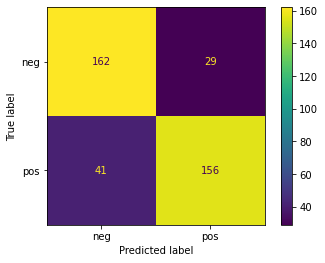

In [93]:
accuracy(pipe)